<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/Find_CompProfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [2]:
import csv
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1D Composition Profile Plot

## Helper Functions and Values

In [ ]:
################################################################################
# If code returns an error you may need to make this number smaller
################################################################################
numbin = 18

## Extract Data and Name Variables

In [ ]:
# Experimental Data (RMC Reconstruction)
file = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Au50Pd50_Profiles_v2/RMC_Dt100_1-10-10_v2/1-10.stru"
# Reference Data File (MC Target)
file_ref = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Au50Pd50_Profiles_v2/MC_Dt100/2000_voidless.stru"
# Save file names
plotTitle = r'RMC Au50Pd50 Dt100_v2: 100 Cycles'
plotsavename = 'RMC_Au50Pd50_Dt100_v2_CP.png'
csvsavename = 'Au50Pd50_RMC_Dt100_v2_CP.csv'
csvsavename_ref = 'Au50Pd50_RMC_Dt100_ref_CP.csv'
# Reference Atom
atom = 'AU'

In [ ]:
################################################################################
# Extract Experimental Data
################################################################################
data = pd.read_csv(file, skiprows=3)
data = data.drop(data.columns[3:], axis=1)
data[["atoms", "x"]] = data[data.columns[0]].str.split(expand=True)
data = data.drop(data.columns[0], axis=1)
data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data = data[data.atom!='VOID']
data["x"] = data["x"].astype(float)
data["y"] = data["y"].astype(float)
data["z"] = data["z"].astype(float)
data["distance"] = np.sqrt((data["x"]*data["x"] + data["y"]*data["y"] + data["z"]*data["z"])*(4.0789*4.0789))
# Output relevant structural info
print("Max distance in angstroms "+str(round(data["distance"].max(),5)) +" - RMC Data")
print("Min distance in angstroms "+str(round(data["distance"].min(),5)) +" - RMC Data")
################################################################################
# Extract Reference Data
################################################################################
data_ref = pd.read_csv(file_ref, skiprows=3)
data_ref = data_ref.drop(data_ref.columns[3:], axis=1)
data_ref[["atoms", "x"]] = data_ref[data_ref.columns[0]].str.split(expand=True)
data_ref = data_ref.drop(data_ref.columns[0], axis=1)
data_ref = data_ref.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data_ref = data_ref[data_ref.atom!='VOID']
data_ref["x"] = data_ref["x"].astype(float)
data_ref["y"] = data_ref["y"].astype(float)
data_ref["z"] = data_ref["z"].astype(float)
data_ref["distance"] = np.sqrt((data_ref["x"]*data_ref["x"] + data_ref["y"]*data_ref["y"] + data_ref["z"]*data_ref["z"])*(4.0789*4.0789))
# Output relevant structural info
print("Max distance in angstroms "+str(round(data_ref["distance"].max(),5)) +" - MC Ref")
print("Min distance in angstroms "+str(round(data_ref["distance"].min(),5)) +" - MC Ref")
################################################################################
# Bin Data between 0 and max distance in "numbin" divisions
################################################################################
# Make bins sizes based off of maximum radius
# realBins = np.linspace(0,data["distance"].max()+.01,numbin)
# Make bins sizes based off of custom max radius
realBins = np.around(np.linspace(0,26,numbin),decimals=2)
data["bin"] = pd.cut(data["distance"], bins=realBins, right=False, precision=2,include_lowest='True',labels=realBins[1:])
data["bin"] = data["bin"].astype(float)
data_ref["bin"] = pd.cut(data_ref["distance"], bins=realBins, right=False, precision=2,include_lowest='True',labels=realBins[1:])
data_ref["bin"] = data_ref["bin"].astype(float)
data = data[["atom","x","y","z","distance","bin"]]
data_ref = data_ref[["atom","x","y","z","distance","bin"]]
################################################################################
# Group atom type by bin in order to plot
################################################################################
data_grouped = (data.groupby("bin")["atom"].value_counts(normalize=True).unstack()).fillna(0)
data_ref_grouped = (data_ref.groupby("bin")["atom"].value_counts(normalize=True).unstack()).fillna(0)
################################################################################
# Output atom/bin grouping info to reference
################################################################################
print("RMC DATA")
print("BIN     #Atoms")
print(data.bin.value_counts())
print("MC DATA")
print("BIN     #Atoms")
print(data_ref.bin.value_counts())

Max distance in angstroms 29.05734 - RMC Data
Min distance in angstroms 0.09299 - RMC Data
Max distance in angstroms 25.17472 - MC Ref
Min distance in angstroms 0.14402 - MC Ref
RMC DATA
BIN     #Atoms
24.47    581
22.94    559
21.41    490
19.88    446
18.35    339
26.00    286
15.29    281
16.82    258
13.76    186
12.24    135
10.71    124
7.65      73
9.18      67
6.12      36
3.06      11
4.59       7
1.53       1
Name: bin, dtype: int64
MC DATA
BIN     #Atoms
24.47    602
22.94    569
21.41    508
19.88    441
18.35    333
26.00    277
15.29    277
16.82    269
13.76    202
12.24    126
10.71    123
9.18      75
7.65      68
6.12      36
3.06      12
4.59       6
1.53       1
Name: bin, dtype: int64


<ipython-input-53-b0ad889de9cc>:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
<ipython-input-53-b0ad889de9cc>:22: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_ref = data_ref.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)


## Make Composition Profile Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

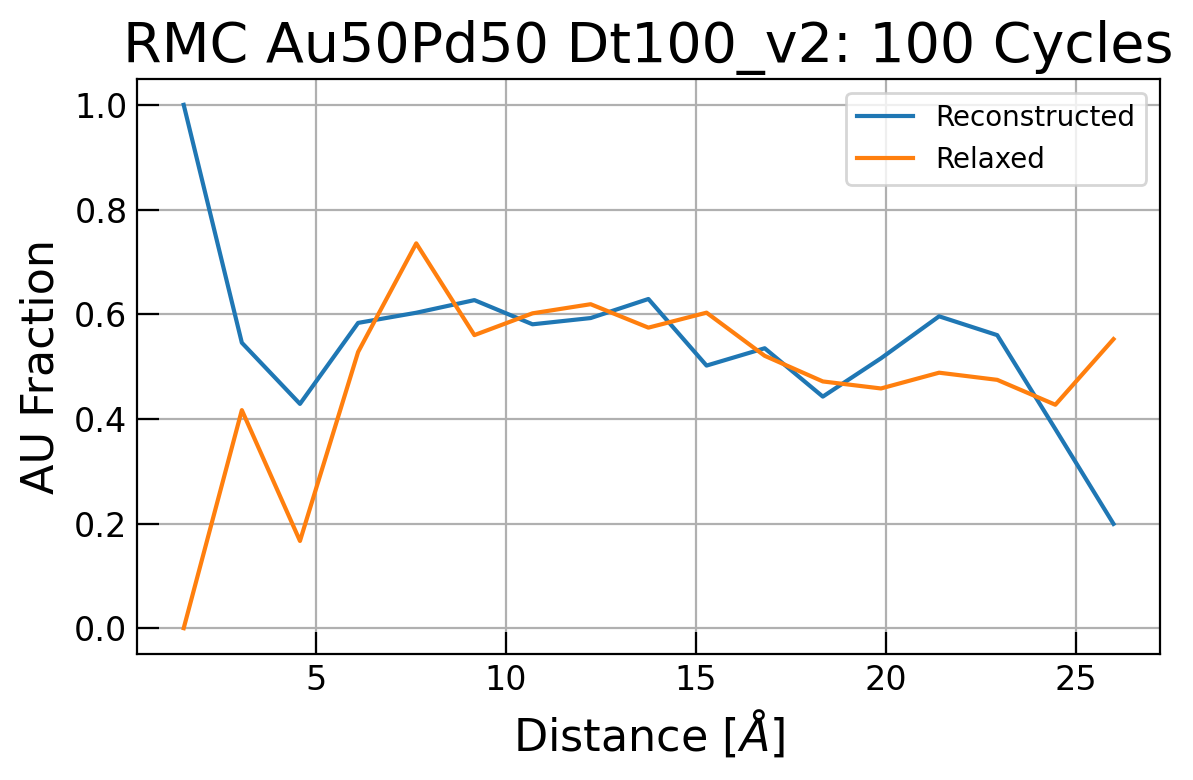

In [ ]:
################################################################################
# Plot Data
################################################################################
fig, ax = plt.subplots(figsize=(6,4,),dpi=200)
ax.plot(realBins[1:],data_grouped[atom], label = "Reconstructed")
ax.plot(realBins[1:],data_ref_grouped[atom], label = "Relaxed")
################################################################################
# Plot settings
################################################################################
ax.set_title(plotTitle, fontsize=20)
ax.set_ylabel(atom+" Fraction", fontsize=16)
ax.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax.set_xlabel(r'Distance [$\AA$]', fontsize=16)
ax.tick_params(axis='x', labelsize=12, direction='in', length=8)
ax.legend()
ax.grid(True)
plt.tight_layout()
# Uncomment to save and download plots
plt.savefig(plotsavename)
files.download(plotsavename)

## Output Data as a csv file

In [ ]:
data_grouped.to_csv(csvsavename)
data_ref_grouped.to_csv(csvsavename_ref)
files.download(csvsavename)
files.download(csvsavename_ref)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2D Composition Profile Plot

## Extract Data and Name Variables

In [3]:
# Experimental Data (RMC Reconstruction)
file = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Au50Pd50_Profiles_v2/RMC_Dt100_1-10-10_v2/1-10.stru"
# Reference Data File (MC Target)
file_ref = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Au50Pd50_Profiles_v2/MC_Dt100/2000_voidless.stru"
# Save file names
plotTitle = r'RMC Au50Pd50 Dt100_v2: 100 Cycles'
plotsavename = 'RMC_Au50Pd50_Dt100_v2_CP.png'
csvsavename = 'Au50Pd50_RMC_Dt100_v2_CP.csv'
csvsavename_ref = 'Au50Pd50_RMC_Dt100_ref_CP.csv'

In [22]:
################################################################################
# Extract RMC Data
################################################################################
data = pd.read_csv(file, skiprows=3)
data = data.drop(data.columns[3:], axis=1)
data[["atoms", "x"]] = data[data.columns[0]].str.split(expand=True)
data = data.drop(data.columns[0], axis=1)
data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data = data[data.atom!='VOID']
################################################################################
# Format RMC Data
################################################################################
data["x"] = data["x"].astype(float)
data["y"] = data["y"].astype(float)
data["z"] = data["z"].astype(float)
data["distance"] = np.sqrt((data["x"]*data["x"] + data["y"]*data["y"] + data["z"]*data["z"]))
# Output relevant structural info
print("Max distance in angstroms "+str(round(data["distance"].max(),5)) +" - RMC Data")
print("Min distance in angstroms "+str(round(data["distance"].min(),5)) +" - RMC Data")

numbin = 25
realBins = np.linspace(-1*data["distance"].max()-.01,data["distance"].max()+.01,numbin)
#print(realBins)
data["xbin"] = pd.cut(data["x"], bins=realBins, right=False, include_lowest='True',labels=realBins[1:]);
data["xbin"] = data["xbin"].astype(float);
data["ybin"] = pd.cut(data["y"], bins=realBins, right=False, include_lowest='True',labels=realBins[1:]);
data["ybin"] = data["ybin"].astype(float);
data["zbin"] = pd.cut(data["z"], bins=realBins, right=False, include_lowest='True',labels=realBins[1:]);
data["zbin"] = data["zbin"].astype(float);
data = data[["atom","x","y","z","distance","xbin","ybin","zbin"]]
################################################################################
# Extract RMC Data
################################################################################
data_ref = pd.read_csv(file_ref, skiprows=3)
data_ref = data_ref.drop(data_ref.columns[3:], axis=1)
data_ref[["atoms", "x"]] = data_ref[data_ref.columns[0]].str.split(expand=True)
data_ref = data_ref.drop(data_ref.columns[0], axis=1)
data_ref = data_ref.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data_ref = data_ref[data_ref.atom!='VOID']
################################################################################
# Format MC Data
################################################################################
data_ref["x"] = data_ref["x"].astype(float)
data_ref["y"] = data_ref["y"].astype(float)
data_ref["z"] = data_ref["z"].astype(float)
data_ref["distance"] = np.sqrt((data_ref["x"]*data_ref["x"] + data_ref["y"]*data_ref["y"] + data_ref["z"]*data_ref["z"])*(4.0789*4.0789))
# Output relevant structural info
print("Max distance in angstroms "+str(round(data_ref["distance"].max(),5)) +" - MC Ref")
print("Min distance in angstroms "+str(round(data_ref["distance"].min(),5)) +" - MC Ref")

data_ref["xbin"] = pd.cut(data_ref["x"], bins=realBins, right=False, include_lowest='True',labels=realBins[1:]);
data_ref["xbin"] = data_ref["xbin"].astype(float);
data_ref["ybin"] = pd.cut(data_ref["y"], bins=realBins, right=False, include_lowest='True',labels=realBins[1:]);
data_ref["ybin"] = data_ref["ybin"].astype(float);
data_ref["zbin"] = pd.cut(data_ref["z"], bins=realBins, right=False, include_lowest='True',labels=realBins[1:]);
data_ref["zbin"] = data_ref["zbin"].astype(float);
data_ref = data_ref[["atom","x","y","z","distance","xbin","ybin","zbin"]]

<ipython-input-22-4dba661ae369>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)


Max distance in angstroms 7.12382 - RMC Data
Min distance in angstroms 0.0228 - RMC Data
Max distance in angstroms 25.17472 - MC Ref
Min distance in angstroms 0.14402 - MC Ref


<ipython-input-22-4dba661ae369>:38: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_ref = data_ref.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)


In [44]:
data

,atom,x,y,z,distance,xbin,ybin,zbin
0,PD,-0.989573,-2.518922,-5.465375,6.098733,-0.594485,-2.377939,-5.350362
1,PD,0.014005,-2.431921,-5.465867,5.982486,0.594485,-2.377939,-5.350362
2,PD,0.985183,-2.470738,-5.407458,6.026254,1.188969,-2.377939,-5.350362
3,PD,-1.488743,-1.468947,-5.883781,6.244441,-1.188969,-1.188969,-5.350362
4,AU,-1.519061,-2.049680,-5.444899,6.012958,-1.188969,-1.783454,-5.350362
...,...,...,...,...,...,...,...,...
3920,PD,-0.480015,0.518053,5.940117,5.981955,0.000000,0.594485,5.944847
3921,PD,-0.041689,-0.007441,5.927744,5.927895,0.000000,0.000000,5.944847
3922,PD,0.476334,0.505704,5.934370,5.974896,0.594485,0.594485,5.944847
3923,AU,1.006021,0.026455,5.986098,6.070103,1.188969,0.594485,6.539332


In [26]:
RMC_data_Au = data[data["atom"] == "AU"]
RMC_data_Pd = data[data["atom"] == "PD"]
MMC_data_Au = data_ref[data_ref["atom"] == "AU"]
MMC_data_Pd = data_ref[data_ref["atom"] == "PD"]

In [27]:
MMC_Au_xy = np.zeros((numbin,numbin))
MMC_Pd_xy = np.zeros((numbin,numbin))
RMC_Au_xy = np.zeros((numbin,numbin))
RMC_Pd_xy = np.zeros((numbin,numbin))
x = 0
for i in realBins:
  y=0
  for j in realBins:
    try:
      MMC_Au_xy[x][y] = len(MMC_data_Au.loc[(MMC_data_Au["xbin"]==i) & (MMC_data_Au["ybin"]==j)])
      MMC_Pd_xy[x][y] = len(MMC_data_Pd.loc[(MMC_data_Pd["xbin"]==i) & (MMC_data_Pd["ybin"]==j)])
      RMC_Au_xy[x][y] = len(RMC_data_Au.loc[(RMC_data_Au["xbin"]==i) & (RMC_data_Au["ybin"]==j)])
      RMC_Pd_xy[x][y] = len(RMC_data_Pd.loc[(RMC_data_Pd["xbin"]==i) & (RMC_data_Pd["ybin"]==j)])
    except:
      None
    y+=1
  x+=1
###############################################################################
MMC_Au_yz = np.zeros((numbin,numbin))
MMC_Pd_yz = np.zeros((numbin,numbin))
RMC_Au_yz = np.zeros((numbin,numbin))
RMC_Pd_yz = np.zeros((numbin,numbin))
x = 0
for i in realBins:
  y=0
  for j in realBins:
    try:
      MMC_Au_yz[x][y] = len(MMC_data_Au.loc[(MMC_data_Au["ybin"]==i) & (MMC_data_Au["zbin"]==j)])
      MMC_Pd_yz[x][y] = len(MMC_data_Pd.loc[(MMC_data_Pd["ybin"]==i) & (MMC_data_Pd["zbin"]==j)])
      RMC_Au_yz[x][y] = len(RMC_data_Au.loc[(RMC_data_Au["ybin"]==i) & (RMC_data_Au["zbin"]==j)])
      RMC_Pd_yz[x][y] = len(RMC_data_Pd.loc[(RMC_data_Pd["ybin"]==i) & (RMC_data_Pd["zbin"]==j)])
    except:
      None
    y+=1
  x+=1
###############################################################################
MMC_Au_zx = np.zeros((numbin,numbin))
MMC_Pd_zx = np.zeros((numbin,numbin))
RMC_Au_zx = np.zeros((numbin,numbin))
RMC_Pd_zx = np.zeros((numbin,numbin))
x = 0
for i in realBins:
  y=0
  for j in realBins:
    try:
      MMC_Au_zx[x][y] = len(MMC_data_Au.loc[(MMC_data_Au["zbin"]==i) & (MMC_data_Au["xbin"]==j)])
      MMC_Pd_zx[x][y] = len(MMC_data_Pd.loc[(MMC_data_Pd["zbin"]==i) & (MMC_data_Pd["xbin"]==j)])
      RMC_Au_zx[x][y] = len(RMC_data_Au.loc[(RMC_data_Au["zbin"]==i) & (RMC_data_Au["xbin"]==j)])
      RMC_Pd_zx[x][y] = len(RMC_data_Pd.loc[(RMC_data_Pd["zbin"]==i) & (RMC_data_Pd["xbin"]==j)])
    except:
      None
    y+=1
  x+=1

In [41]:
diff_Au_xy = np.absolute(np.array(MMC_Au_xy) - np.array(RMC_Au_xy))
diff_Au_yz = np.absolute(np.array(MMC_Au_yz) - np.array(RMC_Au_yz))
diff_Au_zx = np.absolute(np.array(MMC_Au_zx) - np.array(RMC_Au_zx))

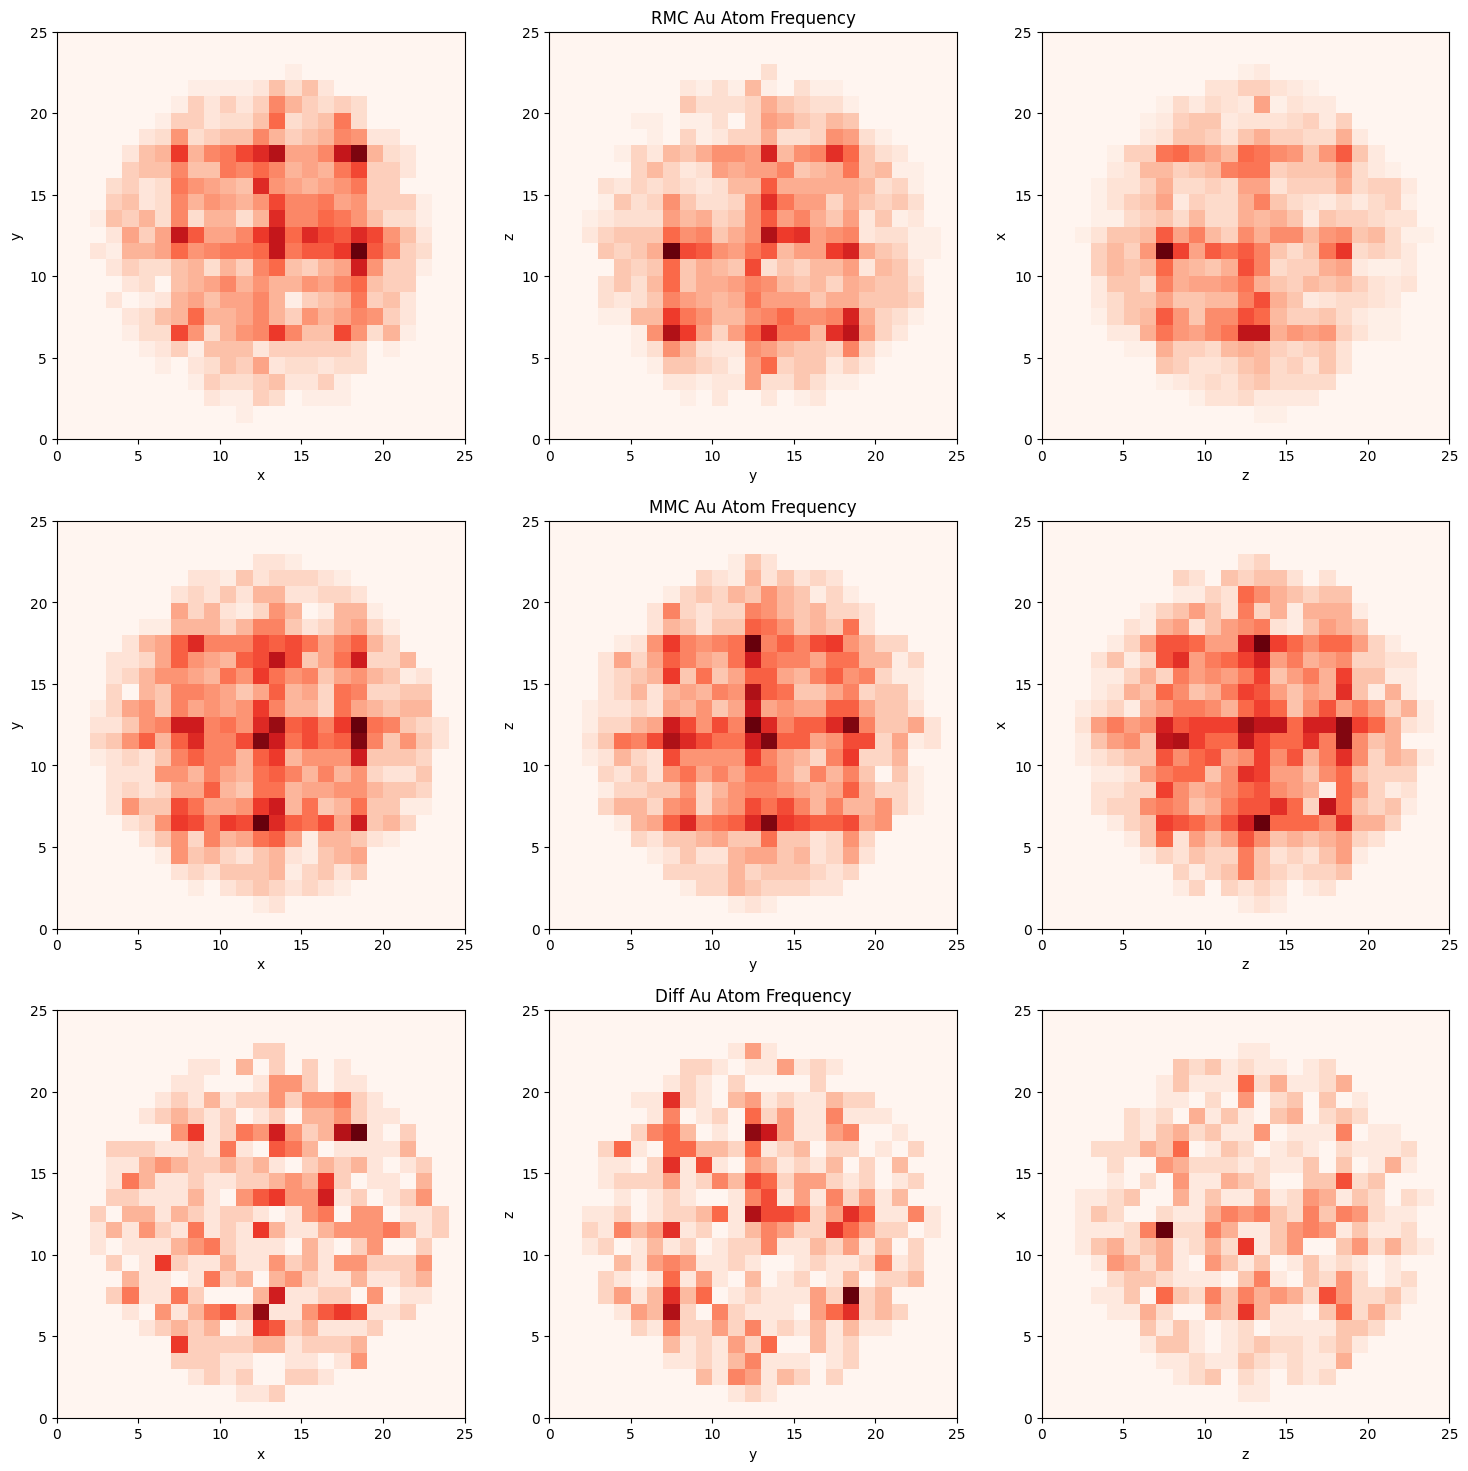

In [43]:
###############################################################################
fig, axs = plt.subplots(3, 3,figsize=(18, 18))
#fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(figsize=(18, 6), ncols=3, nrows=2)
#ax1.set_title("RMC Au Atom Frequency")
axs[0,0].set_xlabel("x")
axs[0,0].set_ylabel("y")
axs[0,0].imshow(RMC_Au_xy, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")
axs[0,1].set_title("RMC Au Atom Frequency")
axs[0,1].set_xlabel("y")
axs[0,1].set_ylabel("z")
axs[0,1].imshow(RMC_Au_yz, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")
#ax3.set_title("RMC Au Atom Frequency")
axs[0,2].set_xlabel("z")
axs[0,2].set_ylabel("x")
axs[0,2].imshow(RMC_Au_zx, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")

#axs[1,0].set_title("MMC Au Atom Frequency")
axs[1,0].set_xlabel("x")
axs[1,0].set_ylabel("y")
axs[1,0].imshow(MMC_Au_xy, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")
axs[1,1].set_title("MMC Au Atom Frequency")
axs[1,1].set_xlabel("y")
axs[1,1].set_ylabel("z")
axs[1,1].imshow(MMC_Au_yz, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")
#ax3.set_title("MMC Au Atom Frequency")
axs[1,2].set_xlabel("z")
axs[1,2].set_ylabel("x")
axs[1,2].imshow(MMC_Au_zx, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")

#axs[1,0].set_title("MMC Au Atom Frequency")
axs[2,0].set_xlabel("x")
axs[2,0].set_ylabel("y")
axs[2,0].imshow(diff_Au_xy, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")
axs[2,1].set_title("Diff Au Atom Frequency")
axs[2,1].set_xlabel("y")
axs[2,1].set_ylabel("z")
axs[2,1].imshow(diff_Au_yz, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")
#ax3.set_title("MMC Au Atom Frequency")
axs[2,2].set_xlabel("z")
axs[2,2].set_ylabel("x")
axs[2,2].imshow(diff_Au_zx, interpolation='none', extent = (0,numbin,0,numbin), cmap = "Reds")